# UCLA Admissions 
#### Data Source: UCLA's Logistic Regression in R tutorial <br/>
http://www.ats.ucla.edu/stat/r/dae/logit.htm <br/><br/>
## **Research Question: What helps you get into UCLA to most - the GPA score, GRE score, or the prestige of your undergraduate school?** <br/>
With a dataset of 400 observations we will explore the dataset and use **Logistic Regression** to predict admittance into UCLA <br/>

## The Data

### Metadata / Data Dictionary

Variable | Summary | Description | Type of Variable | Variable
---| ---| --- | ---
ADMIT | admitted to UCLA or not | 1 admitted, 0 not admitted | binary | $Y$, Predictor, Target, Response, Dependent Variable
GRE | Graduate Record Examinations - standarized test |integers - range from 200 - 800 | discrete* | $X_0$, Predictors, Features, Independent Variable
GPA | Grade Point Average - summation rank of course grades  |floats with precision to the hundredths - range from 0.00 to 4.00 | continous | $X_1$, Predictors, Features, Independent Variable
PRESTIGE | rank of undergraduates' university | integers 4 to 1 (highest)| ordinal | $X_2$, $X_3$, $X_4$ Predictors, Features, Independent Variable

*although GRE score is technically discrete it will be treated as continuous

This dataset is hypothetical - was generated by UCLA - thus there is no timeframe of the data no timeseries charts womp womp

For Logistic Regression:<br/>

coefficients of model out put are the predictors <br/>
$y^*$ = $B_0$ + $B_1*GRE$ + $B_2*GPA$ + $B_3*prestige$ <br/>

then for logistic regression log of the coefficients <br/>
$p$ = $e^y$ / $e^y$ + 1<br/>

then $ln(p)$

In [2]:
import pandas as pd
import numpy as np
# pandas is a very important api for data anaysis this is optimized for working with Data Frames 
# aka a data table like a spreadsheet in excel
# numpy for all your math functions 
# it is a best practice to import all your libaries at the beginning - but I like to import them as they are needed

https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# pretty cool - now I can have multiple outputs from one notebook cell

In [4]:
data = pd.read_csv('assets/admissions.csv')
data.columns = data.columns.str.strip().str.upper()
# making these columns all caps cuz it lox noice 
data.head()
data.tail()
# look the head and tail BOTH show up - awesome!

,ADMIT,GRE,GPA,PRESTIGE
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


,ADMIT,GRE,GPA,PRESTIGE
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0
399,0,600.0,3.89,3.0


## The hypothesis
Does an increase or decrease in GRE, GPA, and Prestige affect admittance rates?
* $h_0^a$ There is not a trend in GRE and admittance rate
* $h_1^a$ There is a trend in GRE and admittance rate <br/><br/>
* $h_0^b$ There is not a trend in GPA and admittance rate
* $h_1^b$ There is a trend in GPA and admittance rate <br/><br/>
* $h_0^c$ There is not a trend in prestige and admittance rate
* $h_1^c$ There is a trend in prestige and admittance rate <br/><br/>

### Data Preprocessing / Cleaning
not much - this data set is good to go - just going to drop a few rows that have null values

In [5]:
data.shape
# (rows, columns)

(400, 4)

In [6]:
print "GRE null indicies",np.where(data['GRE'].isnull())[0]
print "GPA null indicies", np.where(data['GPA'].isnull())[0]
print "PRESTIGE null indicies", np.where(data['PRESTIGE'].isnull())[0]
# the rows where there is a null value

GRE null indicies [187 212]
GPA null indicies [187 236]
PRESTIGE null indicies [236]


In [7]:
data.loc[187]
data.loc[212]
data.loc[236]
# note it is interesting that one "person" was admitted with out a GPA or prestige score

ADMIT       0.0
GRE         NaN
GPA         NaN
PRESTIGE    2.0
Name: 187, dtype: float64

ADMIT       0.00
GRE          NaN
GPA         2.87
PRESTIGE    2.00
Name: 212, dtype: float64

ADMIT         1.0
GRE         660.0
GPA           NaN
PRESTIGE      NaN
Name: 236, dtype: float64

In [8]:
# drop nulls
df = data.dropna()
df.shape
# 397 records remain - lost 3 rows 

(397, 4)

## Exploratory Analysis

In [9]:
statsDF = df.describe()
statsDF

,ADMIT,GRE,GPA,PRESTIGE
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


http://www.statisticshowto.com/probability-and-statistics/interquartile-range/

In [10]:
# IQR 
q75 = statsDF.loc["75%"]
q25 = statsDF.loc["25%"]
# index

# map(lambda (output): action, process)
IQR = map(lambda (x75, x25): x75 - x25, zip(q75, q25))

# dictionary
IQRindex = {"ADMIT": IQR[0], 
            "GRE": IQR[1], 
            "GPA": IQR[2], 
            "PRESTIGE": IQR[3]}

# new dfIQR of IQRindex dictionary - set inxes of dataframe
dfIQR = pd.DataFrame(IQRindex, index = range(1))
A = statsDF.append(dfIQR)

# 
std = statsDF.loc["std"]
mean = statsDF.loc["mean"]

Rstd = map(lambda (std, mean): (std / mean) * 100, zip(std, mean))

Rstd_index = {"ADMIT": Rstd[0], 
            "GRE": Rstd[1], 
            "GPA": Rstd[2], 
            "PRESTIGE": Rstd[3]}

df_Rstd = pd.DataFrame(Rstd_index, index = range(1))
A.append(df_Rstd)
# put it all together 

,ADMIT,GPA,GRE,PRESTIGE
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,3.392242,587.858942,2.488665
std,0.466044,0.380208,115.717787,0.947083
min,0.000000,2.260000,220.000000,1.000000
25%,0.000000,3.130000,520.000000,2.000000
50%,0.000000,3.400000,580.000000,2.000000
75%,1.000000,3.670000,660.000000,3.000000
max,1.000000,4.000000,800.000000,4.000000
0,1.000000,0.540000,140.000000,1.000000
0,146.840899,11.208172,19.684618,38.055886


Ok so first the 0 in the row above is the Interquartile **Range** - This helps explain the distribution of the data.  75% is Quartile 3 (Q3) and 25% is Quartile 1 (Q1). The Interquartile Range (IQR) is Q3 - Q1. So the middle 50% of the data for GPA varies by .54 and for GRE by 140 points. The second (last) 0 index is the relative standard deviation. **Relative standard deviation** tells you how much varibility the data has in respect to the mean. Comparing GPA to GRE you can see that GRE has a greater percentage than GPA.  GRE numbers vary more than GPA.  Prestige varies the most, but this is categorical data so you cannot really interpert variability - see frequency tables below the box plots for that. Back to GRE and GPA the distribution of the data with the Interquartile Range can be visualized with box plots below. Basically the point of this looking at the distibution of the numerical data is to see if if is fairly normally distributed.  GPA and GRE pass the test essentially. Both are skewed to the right meaning most of the data is a little to the higher side in value, which makes sense. <br/>
To meet normal distribution the mean = the median = the mode and the distribution would be symmetrical. Addationally under normal distribution, 95% of the data is within 2 standard deviations of the mean. 
The data is normally distributed for the most part, but there is some skewness. GRE is more normally distributed than GPA and is more symmetrical.  Values of skewness between -0.5 and 0.5 are considered acceptable for normal distribution. https://help.gooddata.com/display/doc/Normality+Testing+-+Skewness+and+Kurtosis

In [38]:
df.skew()

ADMIT       0.787669
GRE        -0.146047
GPA        -0.216889
PRESTIGE    0.086506
dtype: float64

peakedness

In [29]:
df.kurt()

ADMIT      -1.386588
GRE        -0.332864
GPA        -0.563570
PRESTIGE   -0.901038
dtype: float64

### Visualize 

GRE and GPA Box Plots <br/>
https://plot.ly/~akell47/34/gre/ <br/>
https://plot.ly/~akell47/50/gpa/

In [17]:
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
# these box plots use plotly as dependancy
# plotly.tools.set_credentials_file(username='yourUserName', api_key='yourAPIkey')

In [18]:
GRE = [
    go.Box(
        x= df.GRE,
        name = 'GRE',
        boxpoints='all',
        jitter=0.5,
        pointpos=0,
        marker = dict(
            color = 'rgb(199, 21, 133)',
#             I <3 pink
        )
    )
]
py.iplot(GRE)


GPA = [
    go.Box(
        x= df.GPA,
        name = 'GPA',
        boxpoints='all',
        jitter=0.5,
        pointpos=0,
        marker = dict(
            color = 'rgb(50, 30, 112)',
#             this is a really nice color
        )
    )
]
py.iplot(GPA)
# these box plots are really nice because you can actually see the data points 
# and hover over the plot for each quartile pop-up
# You can see the discreteness of values in GRE and the more continuous values in GPA 

Prestige of 1 is the highest ranked prestige and 4 is the lowest prestige. Most applicants had a 2 or 3 prestige.

In [19]:
import seaborn as sns
%matplotlib inline
# well developed and visually appealing vizualization api - also don't need all that logging in like with plotly
# and "loading graph is annoying"
# declarative style code

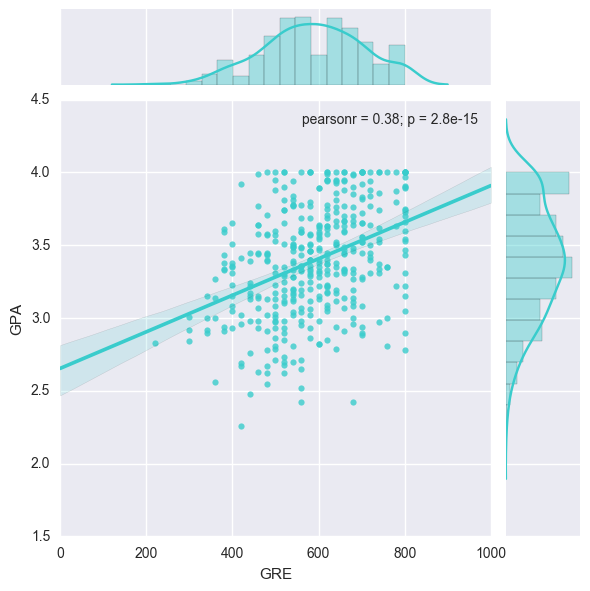

In [20]:
sns.jointplot('GRE', 'GPA', data = df, color = "#39CCCC", kind = "reg")
# fancy!

This plot shows you the relationship between GRE and GPA and on the sides is a histogram _with_ the bell curve line of value frequencies in a nice teal color. You can see there is a positive correlation between GRE and GPA.

In [27]:
df[["GRE", "GPA", "PRESTIGE"]].corr()

,GRE,GPA,PRESTIGE
GRE,1.000000,0.382408,-0.124533
GPA,0.382408,1.000000,-0.060976
PRESTIGE,-0.124533,-0.060976,1.000000


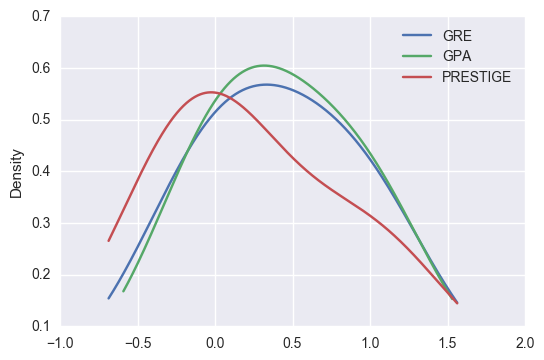

In [40]:
import matplotlib.pyplot as plt
Correlation = df[["GRE", "GPA", "PRESTIGE"]].corr()

plt.figure()
Correlation.plot.kde()

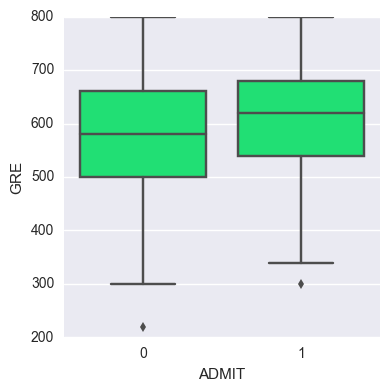

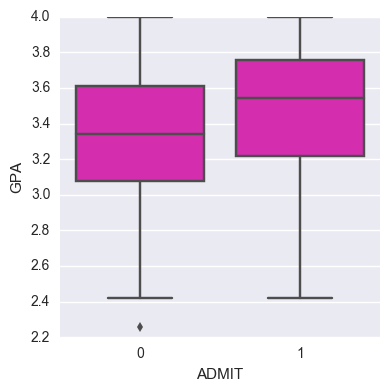

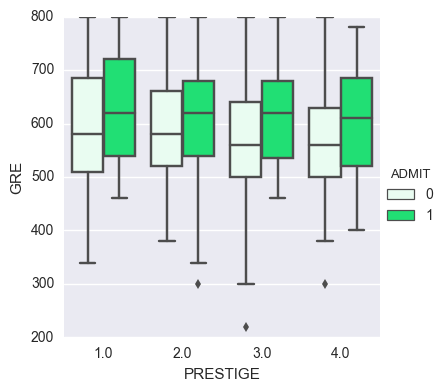

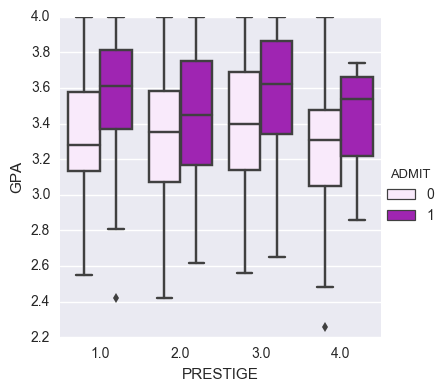

In [22]:
sns.factorplot(
#     col = 'Open',
#     hue='ADMIT',
    x='ADMIT',
    color = '#01FF70',
    y='GRE',
    data = df, 
    kind='box'
)
sns.factorplot(
#     col = 'Open',
#     hue='ADMIT',
    x='ADMIT',
    color = '#F012BE',
    y='GPA',
    data = df, 
    kind='box'
)
sns.factorplot(
#     col = 'Open',
    hue='ADMIT',
    x='PRESTIGE',
    color = '#01FF70',
    y='GRE',
    data = df, 
    kind='box'
)
sns.factorplot(
#     col = 'Open',
    hue='ADMIT',
    x='PRESTIGE',
    color = '#B10DC9',
    y='GPA',
    data = df, 
    kind='box'
)
# box plots are great

In [110]:
df.PRESTIGE.value_counts()

2.0    148
3.0    121
4.0     67
1.0     61
Name: PRESTIGE, dtype: int64

## Two way Frequency Table of Prestige and Admit <br/>

In [111]:
admit_prestige = pd.crosstab(index = df.ADMIT, columns = df['PRESTIGE'], margins = True)
admit_prestige.index = ["rejected", "accepted", "Total"]
# admit_prestige

GPAavg = df.pivot_table(values = ['GPA'], index = ['ADMIT'], aggfunc= np.mean, margins = True)
GPAavg.index = ["rejected", "accepted", "Total"]
a= GPAavg.join(admit_prestige)

GREavg = df.pivot_table(values = ['GRE'], index = ['ADMIT'], aggfunc= np.mean, margins = True)
GREavg.index = ["rejected", "accepted", "Total"]
b = GREavg.join(a)
b

,GRE,GPA,1.0,2.0,3.0,4.0,All
rejected,573.579336,3.347159,28,95,93,55,271
accepted,618.571429,3.489206,33,53,28,12,126
Total,587.858942,3.392242,61,148,121,67,397


GPA and GRE have higher averages when admit == 1

In [112]:
df.mean()

ADMIT         0.317380
GRE         587.858942
GPA           3.392242
PRESTIGE      2.488665
dtype: float64

Two way Frequency Table of Prestige and Admit RATIO<br/>
Highest Rate of acceptance was with a prestige of 2, followed by prestige of 1. <br/>
Highest Rage of rejection was with a prestige of 2, followed closly by prestige of 3. 

In [113]:
b/b.ix["Total", "All"]
# ratio

,GRE,GPA,1.0,2.0,3.0,4.0,All
rejected,1.444784,0.008431,0.070529,0.239295,0.234257,0.138539,0.68262
accepted,1.558114,0.008789,0.083123,0.133501,0.070529,0.030227,0.31738
Total,1.480753,0.008545,0.153652,0.372796,0.304786,0.168766,1.00000


### Odds and Odds Ratio
Lets compare the rate of acceptance between prestige of 4 and of 1 using odds ratio. <br/>
Odds Ratio is a simple statistic that tells a big story

In [118]:
A1 = b.loc["accepted"]
A0 = b.loc["rejected"]

O1 = A1/A0
Odds['Odds'] = pd.DataFrame(O1)
Odds
# Odds of acceptance for every parameter

,0,Odds
GRE,1.078441,1.078441
GPA,1.042438,1.042438
1.0,1.178571,1.178571
2.0,0.557895,0.557895
3.0,0.301075,0.301075
4.0,0.218182,0.218182
All,0.464945,0.464945


In [123]:
# Odds Ratio of Prestige = 4 VS Prestige = 1
print "Odds Ratio of Prestige = 4 vs Prestige = 1: {}".format(1.179 / 0.218)

Odds Ratio of Prestige = 4 vs Prestige = 1: 5.40825688073


From a prestige of 1 to a prestige of 4 one is 5 times more likely to be admitted.

# Make Predicitons
### Dummy Variables on Prestige 
Logistic Regression Data Prep

In [124]:
# make dummy variables
dummies = pd.get_dummies(df['PRESTIGE'], prefix = 'P')
df = df.join(dummies)
df.head()

,ADMIT,GRE,GPA,PRESTIGE,P_1.0,P_2.0,P_3.0,P_4.0
0,0,380.0,3.61,3.0,0.0,0.0,1.0,0.0
1,1,660.0,3.67,3.0,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,1.0,0.0,0.0,0.0
3,1,640.0,3.19,4.0,0.0,0.0,0.0,1.0
4,0,520.0,2.93,4.0,0.0,0.0,0.0,1.0


In [125]:
# column to keep for model
keepCols = ['ADMIT', 'GRE', 'GPA', 'P_1.0', 'P_2.0', 'P_3.0']
df = df[keepCols]
df.head()

,ADMIT,GRE,GPA,P_1.0,P_2.0,P_3.0
0,0,380.0,3.61,0.0,0.0,1.0
1,1,660.0,3.67,0.0,0.0,1.0
2,1,800.0,4.00,1.0,0.0,0.0
3,1,640.0,3.19,0.0,0.0,0.0
4,0,520.0,2.93,0.0,0.0,0.0


## Logistic Regression with sklearn api

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
model = LogisticRegression()

Define X and y for the model

In [140]:
X = df[df.columns[1:] ]
y = df.ADMIT
X.head()

,GRE,GPA,P_1.0,P_2.0,P_3.0
0,380.0,3.61,0.0,0.0,1.0
1,660.0,3.67,0.0,0.0,1.0
2,800.0,4.00,1.0,0.0,0.0
3,640.0,3.19,0.0,0.0,0.0
4,520.0,2.93,0.0,0.0,0.0


#### LogisticRegressionCV()
`CV` = Cross Validation <br/>
Validating the model by splitting the dataset using K-Folds <br/>
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html


In [141]:
# internally preforms k-folds

# cv : integer or cross-validation generator
#     The default cross-validation generator used is Stratified K-Folds.
#     If an integer is provided, then it is the number of folds used.

# cv = 5
modelCVa = LogisticRegressionCV(cv=5)
results5 = modelCVa.fit(X ,y)
results5.coef_

array([[ 0.00222171,  0.70905267,  1.46735347,  0.79753278,  0.15500038]])

Cross Validation k-folds = 5

In [142]:
CoefCVa = results5.coef_
CoefCV5 = pd.DataFrame(CoefCVa)
CoefCV5

,0,1,2,3,4
0,0.002222,0.709053,1.467353,0.797533,0.155


Cross Validatoin k-folds = 20

In [143]:
# cv = 20
modelCVb = LogisticRegressionCV(cv=20)
results20 = modelCVb.fit(X ,y)
results20.coef_

array([[ 0.00218322,  0.65028041,  1.37995181,  0.72782847,  0.09247397]])

In [144]:
CoefCVb = results20.coef_
CoefCV20 = pd.DataFrame(CoefCVb)
CoefCV20

,0,1,2,3,4
0,0.002183,0.65028,1.379952,0.727828,0.092474


In [147]:
scores = cross_val_score(model, X, y, cv=5)

# cv : int, cross-validation generator or an iterable, optional
#     Determines the cross-validation splitting strategy.
#     Possible inputs for cv are:

#     - None, to use the default 3-fold cross-validation, <--- default is 3 - good to know
#     - integer, to specify the number of folds. <----- we are doing 5
#     - An object to be used as a cross-validation generator.
#     - An iterable yielding train/test splits.

print "Accuracy score of each fold: {}".format(scores)
# accuracy score of each k-fold

resultsAll = model.fit(X ,y)
allPreds = resultsAll.predict(X)
print "Total Accuracy Score: {}".format(accuracy_score(y,allPreds))

Accuracy score of each fold: [ 0.69135802  0.72151899  0.69620253  0.64556962  0.72151899]
Total Accuracy Score: 0.700251889169


accuracy score of each fold of the data is pretty much the same as the accuracy score of the whole data set so there is not bias within our data

In [148]:
df["predictionCol"] = allPreds
df.head()

,ADMIT,GRE,GPA,P_1.0,P_2.0,P_3.0,predictionCol
0,0,380.0,3.61,0.0,0.0,1.0,0
1,1,660.0,3.67,0.0,0.0,1.0,0
2,1,800.0,4.00,1.0,0.0,0.0,1
3,1,640.0,3.19,0.0,0.0,0.0,0
4,0,520.0,2.93,0.0,0.0,0.0,0


In [150]:
resultsAll = model.fit(X ,y)
allPreds = resultsAll.predict(X)

a = zip(allPreds, y)
ab = pd.DataFrame(a, columns = ('admitTrue', 'admitPred'))
ab.head()

,admitTrue,admitPred
0,0,0
1,0,1
2,1,1
3,0,1
4,0,0


In [153]:
print "Oh look the accuracy score of this model is: {}% good right? well lets see".format(metrics.accuracy_score(allPreds, y) *100) 
# accuracy score comparing y_Prediction to y_actual which is the admit column. 

Oh look the accuracy score of this model is: 70.0251889169% good right? well lets see


Acutal Totals for admit = 1 and admit = 0

In [155]:
ab.groupby("admitTrue").count()
# Totals of the the original data for admissions. 
# 354 were not admitted = 0
# 43 were admitted = 1
# -------------
ab.groupby("admitPred").count()
# Totals of the predicted data for admissions
# 271 were predicted to not be admitted = 0
# 126 were predicted to be admitted = 1

,admitPred
admitTrue,
0,360
1,37


,admitTrue
admitPred,
0,271
1,126


How many of admit = 1 and admit = 0 did we get right?

    admit = 0 = predicted 271 / real 354 = 76.5%
    admit = 1 = real 43 / predicted 126 = 34.1%

this does not mean anything actually - what we actually want to know how many times 0 was predicted and 0 was the true value and how many times 1 was predicted and 1 was the outcome


## Confusion Matrix
### Crosstab Actual VS Model Prediction
Comparrison of the real data and the predicted 

In [156]:
ct = pd.crosstab(index = ab.admitTrue, columns = ab.admitPred, margins = True)
ct.index = ["Actual 0", "Predicted 1", "Total"]
ct 

admitPred,0,1,All
Actual 0,256,104,360
Predicted 1,15,22,37
Total,271,126,397


- | - | -
-- | -- | --
Top Left |    256 | shows how many matches there were for admit = 0 and predicted admit = 0 
Bottom Right | 22  | shows how many matches there were for admit = 1 and predicted admit = 1 
Bottom Left |  15  | number of times it was predicted admit = 1 but acutally it admit = 0 
Top Right | 104 | number of times  admit = 0 but it was predicted that admit = 1, false hope

In [157]:
print metrics.classification_report(allPreds, y)

             precision    recall  f1-score   support

          0       0.94      0.71      0.81       360
          1       0.17      0.59      0.27        37

avg / total       0.87      0.70      0.76       397



precision score summs up above with the Crosstab Actual vs Predicted.<br/>
For predicting 0 this model is awesome - with 94% right <br/>
For actually predicting admit = 1 however this model predicts it right 17% of the time. <br/>

(support is the totals of the true data. )

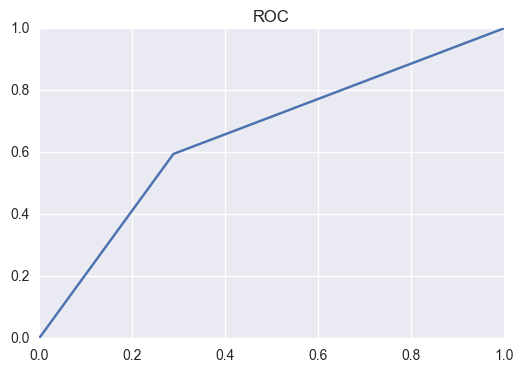

In [158]:
# ROC curve
# sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
ax = plt.subplot(111)
val = metrics.roc_curve(ab.admitTrue, ab.admitPred)

ax.plot(val[0], val[1])
ax.set(title = "ROC")

### Conclusion 
Is this better than guessing?
If the area under the ROC curve is greater than 50% then yes <br/>
50% is a diagonal line. The ROC curve IS greater than 50% so yes the model is better than guessing.<br/>
The area under the roc curve is 65% so the model is 15% better than at random.  So the model is useful I suppose

In [159]:
metrics.roc_auc_score(ab.admitTrue, ab.admitPred)

0.65285285285285288

Improvements - http://www.utsa.edu/lrsg/teaching/geo6011/howtowritepaper.pdf 